In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
#pd.options: This is an attribute in Pandas that allows you to access and modify various options to customize the behavior of Pandas.
#display.float_format: This is a specific option under pd.options that controls the formatting of floating-point numbers when they are displayed.
#{:.2f}'.format: This is a string format specification. In this case, '{:.2f}' specifies that floating-point numbers should be displayed with two decimal places.
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/j/Projects/Datasets/Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the data!

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


The dataset has too many features with text data and are probably categorical features!
Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [10]:
# Converting DataFrame column elements from string to float using the following code line :
# df['TotalCharges'] = df['TotalCharges'].astype(float)

l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


- Calculate the length (number of words) in each element of the 'TotalCharges' column
l1 = [len(i.split()) for i in data['TotalCharges']]
l1 is a list comprehension that iterates over each element in the 'TotalCharges' column of the DataFrame data. For each element, it calculates the number of words by splitting the string using the default whitespace separator. The resulting list l1 contains the lengths of each element in terms of the number of words.

- Create a list of indices where the length is not equal to 1
l2 = [i for i in range(len(l1)) if l1[i] != 1]
l2 is another list comprehension that creates a list of indices (i) where the corresponding length in l1 is not equal to 1. This is done to identify positions where 'TotalCharges' has more than one word.

- Print the indices with empty spaces
print('Index Positions with empty spaces: ', *l2)
This line prints the indices (l2) where the 'TotalCharges' column has more than one word.

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df.dropna(inplace=True)

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df.drop(columns = ['customerID'], inplace = True)

#  label encoding transformation for categorical features.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True) #This argument specifies that a deep copy should be created. 
#A deep copy creates a new object with a new set of data and index, completely independent of the original DataFrame. 
#Changes to one DataFrame will not affect the other.
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


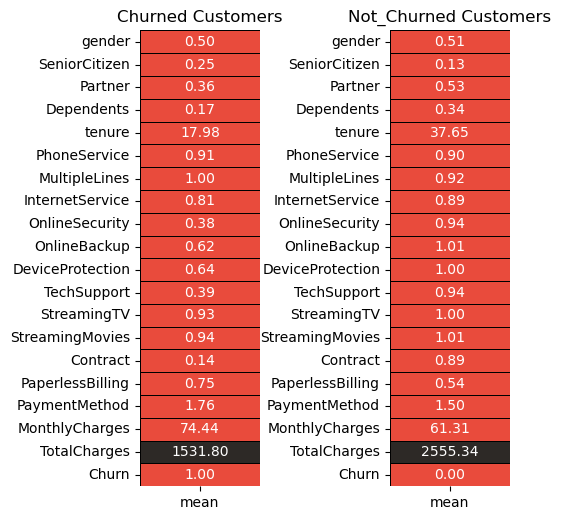

In [16]:
# Define colors for the heatmap
colors = ['#E94B3C','#2D2926']

# Filter DataFrame to get statistics for churned and not-churned customers
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

# Create a subplot with 1 row and 2 columns
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

# Adjust layout for better appearance
fig.tight_layout(pad = 0)


This code is using the Seaborn library to create two side-by-side heatmaps to visualize the mean values of selected features for customers who have churned (Churn == 1) and customers who have not churned (Churn == 0). Let's break down the code line by line:

Mean values of all the features for churned and not-churned customers.
Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.
Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
Churned customer's Contract value is much smaller than those of not-churned customers.
Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.
From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

# EDA

In [21]:
numerical_features = df.select_dtypes(include='number')
categorical_features = df.select_dtypes(include='object')

In [22]:
categorical_features

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


   # TARGET VARIABLE VISUALIZATION (CHURN)

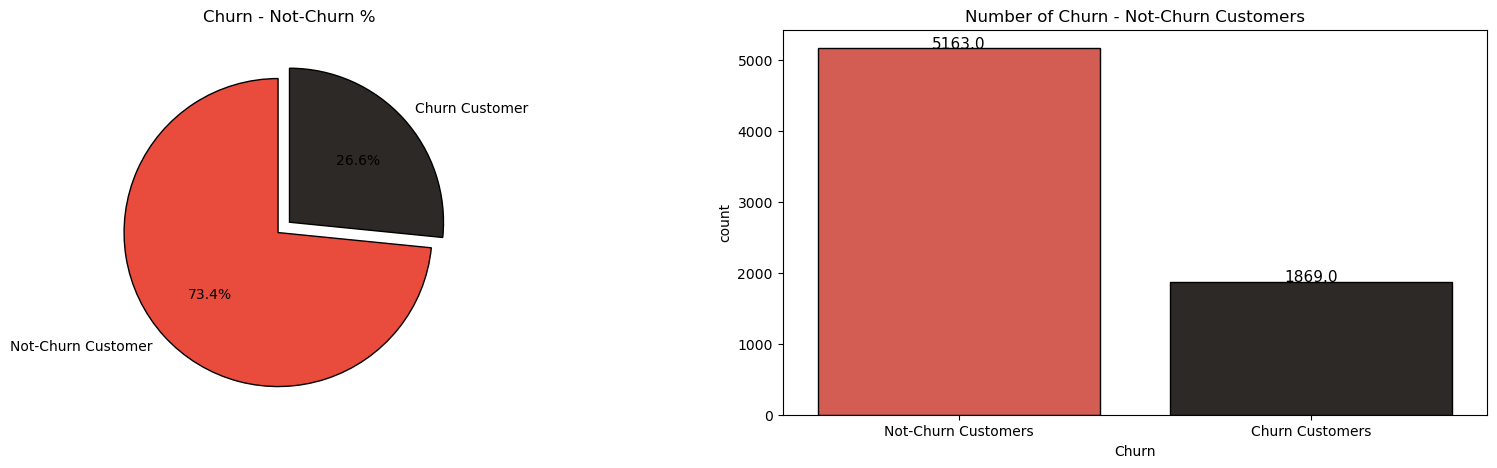

In [31]:
# Count the number of churned and not-churned customers and create a list
l = list(df1['Churn'].value_counts())

# Calculate the percentage of churned and not-churned customers
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100] #circle: Calculates the percentage of churned and not-churned customers relative to the total count.

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)

## Plot the first pie chart for the percentage of churned and not-churned customers
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

#autopct: Displays the percentage on each segment.
#startangle: Angle at which the first wedge is drawn.
#explode: Separates the 'Churn Customer' wedge from the rest.
#wedgeprops: Properties for the wedges, like edge color and linewidth.
    
plt.title('Churn - Not-Churn %');



plt.subplot(1,2,2)
# Plot the second bar chart for the number of churned and not-churned customers
ax = sns.countplot(x ='Churn', data=df, palette = colors, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()


The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
Due to this, predictions will be biased towards Not-Churn customers.
Visualizations will also display this bias!

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)


This code is part of a loop that iterates over each rectangular "patch" in a Seaborn countplot (ax.patches). The purpose of the loop is to annotate each bar in the countplot with its corresponding height (count). 

for rect in ax.patches:: This is a loop that iterates over each patch (rectangle) in the ax.patches collection. Each patch represents a bar in the countplot.

ax.text(: This is the text method of the Axes object (ax). It is used to add text to the plot.

rect.get_x() + rect.get_width() / 2: This part calculates the x-coordinate for placing the text. It takes the x-coordinate of the left edge of the rectangle (rect.get_x()) and adds half of the width of the rectangle (rect.get_width() / 2). This positions the text at the horizontal center of the bar.

rect.get_height() + 2: This part calculates the y-coordinate for placing the text. It takes the height of the rectangle (rect.get_height()) and adds 2 units. This positions the text slightly above the top of the bar.

rect.get_height(): This is the actual text that will be displayed. It represents the height (count) of the bar.

horizontalalignment='center': This parameter specifies that the text should be horizontally centered at the specified x-coordinate.

fontsize=11: This parameter sets the font size of the text to 11.

In summary, this loop goes through each bar in the countplot, calculates the appropriate coordinates to place text at the center above each bar, and adds the count of each bar as text on the plot. This kind of annotation is often used to provide additional information about the data points in a visualization.

# Categorical Features vs Target Variable (Churn):

In [34]:
categorical_features = categorical_features.drop('Churn', axis =1)

In [35]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

# Group 1 : Customer Information :

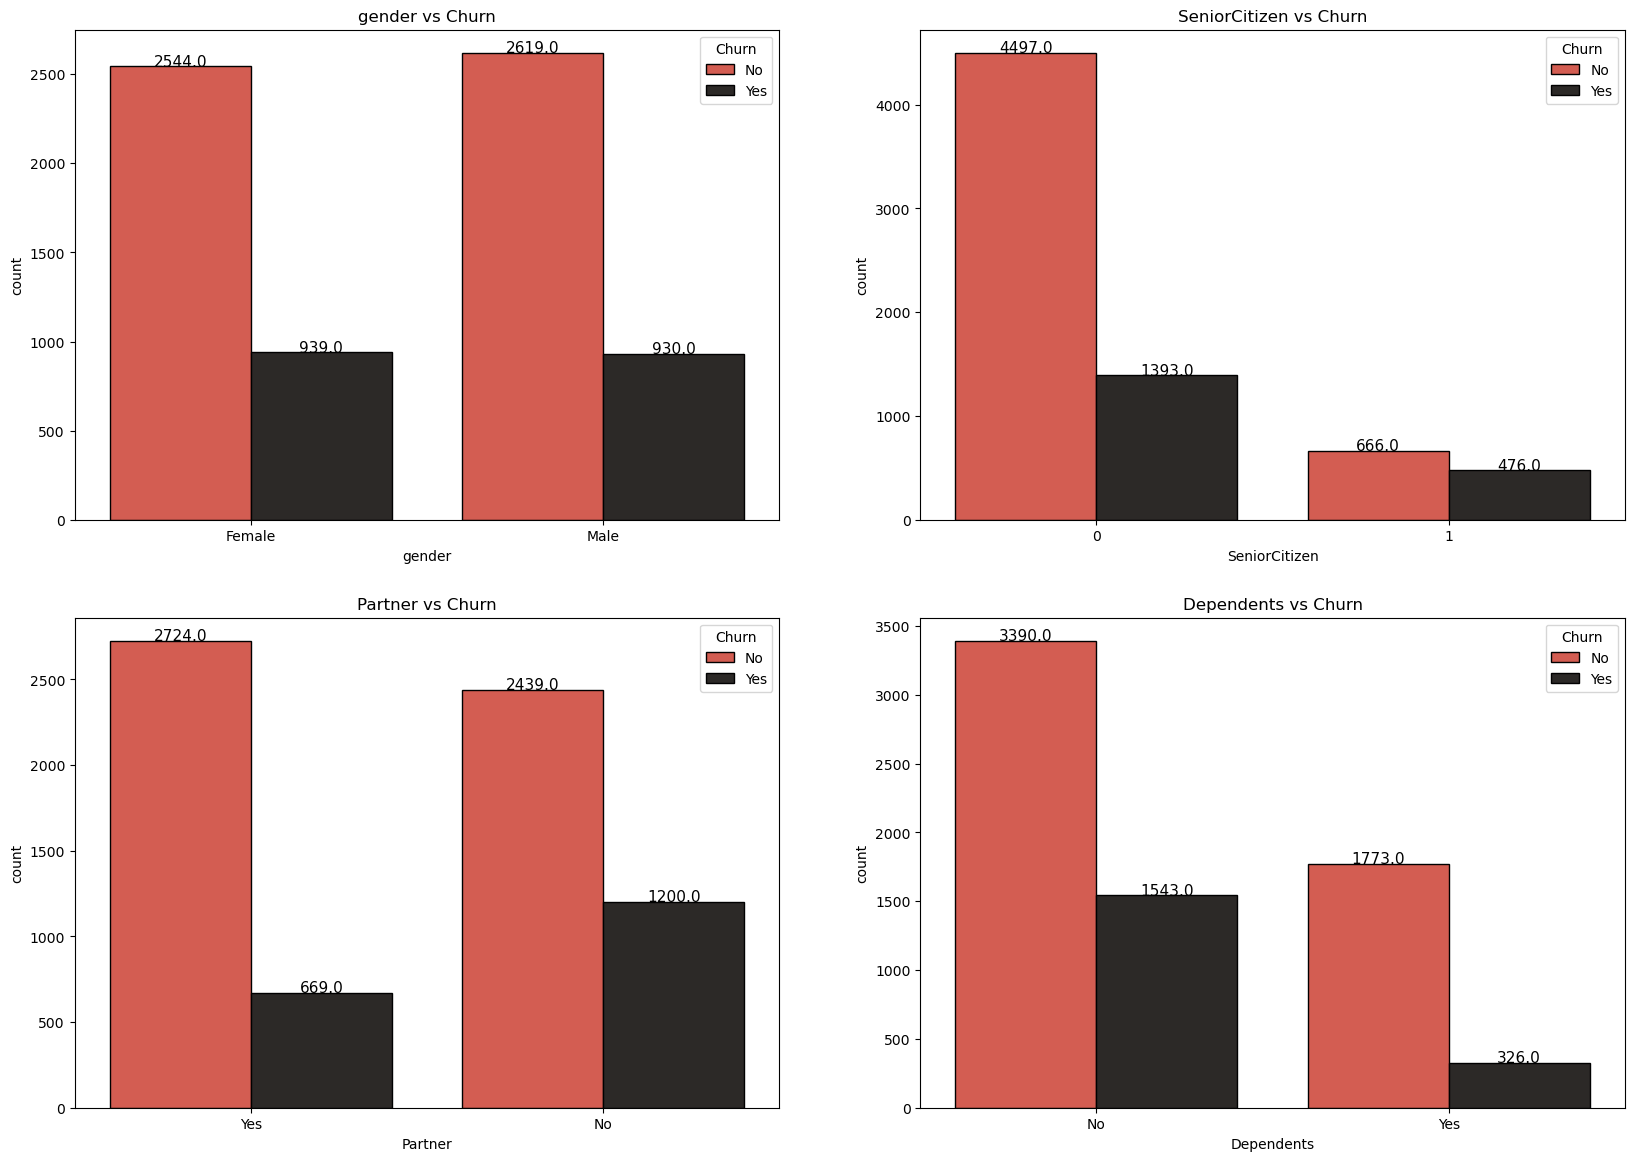

In [38]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x = l1[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

- Customer churning for male & female customers is very similar to each other!
-Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
- Customers who are housing with a Partner churned less as compared to those not living with a Partner.
- Similary, churning is high for the customers that don't have Dependents with them!

# Group 2: Services Subscribed by the Customer :
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |¶

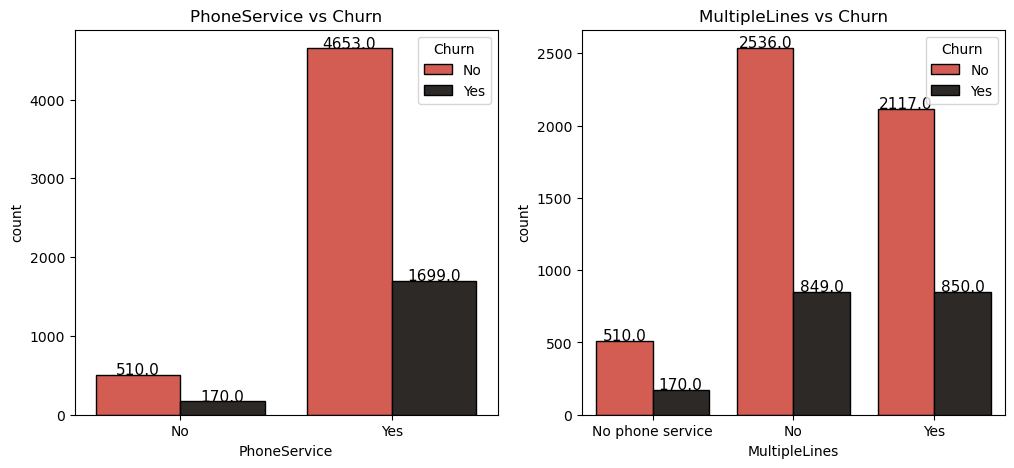

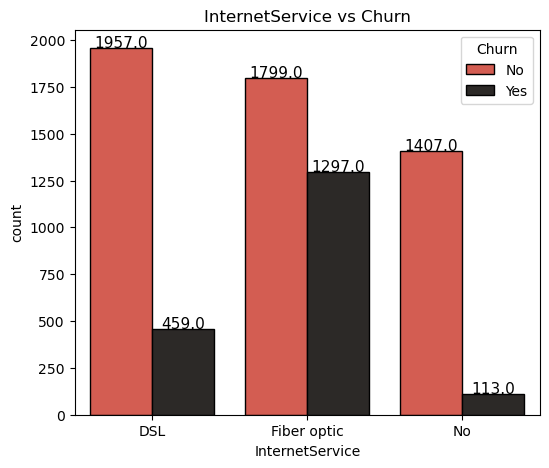

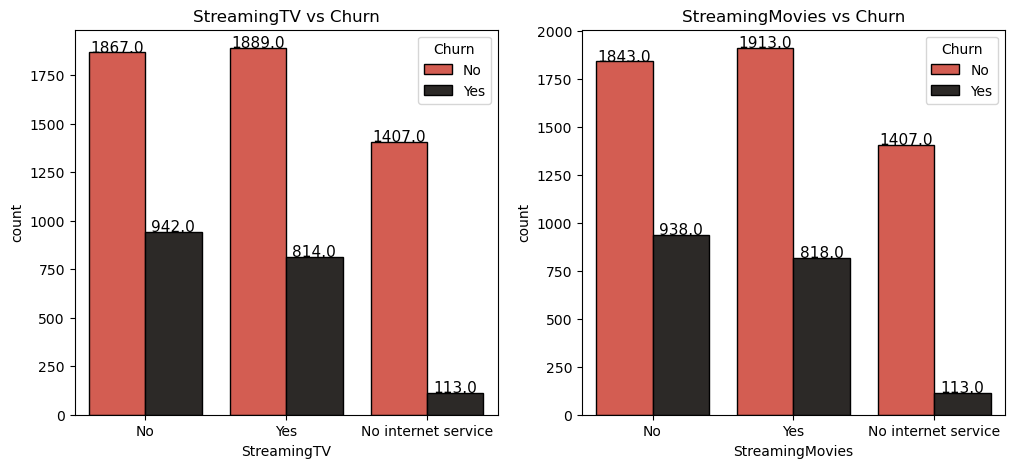

In [41]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x = l2[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x = l2[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x = l2[i + 3],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

- From this, we can see the customers with phone service are less likely to churn.
- Customers with only a single line are also less likely to churn but not a really large difference than those that have multiple lines
- Customers with internet service have a lesser churn amount than customers with no internet service. DSL has the least churn, then fiber optics. But there is a caveat. Customers with no internet service have a lower churn percentage than customers that use fiber optics. The churn rate of customers that use fiber optics is more than x2 of churned dsl customers and more than x10 of customers that don't use any internet service
- customers that use streaming tv have the least churn and the most non-churn although it's not that greater than customers that use a streaming TV
- The same applies with customers that use streaming movies service. StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

# Group 2: Services Subscribed by the Customer :


OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

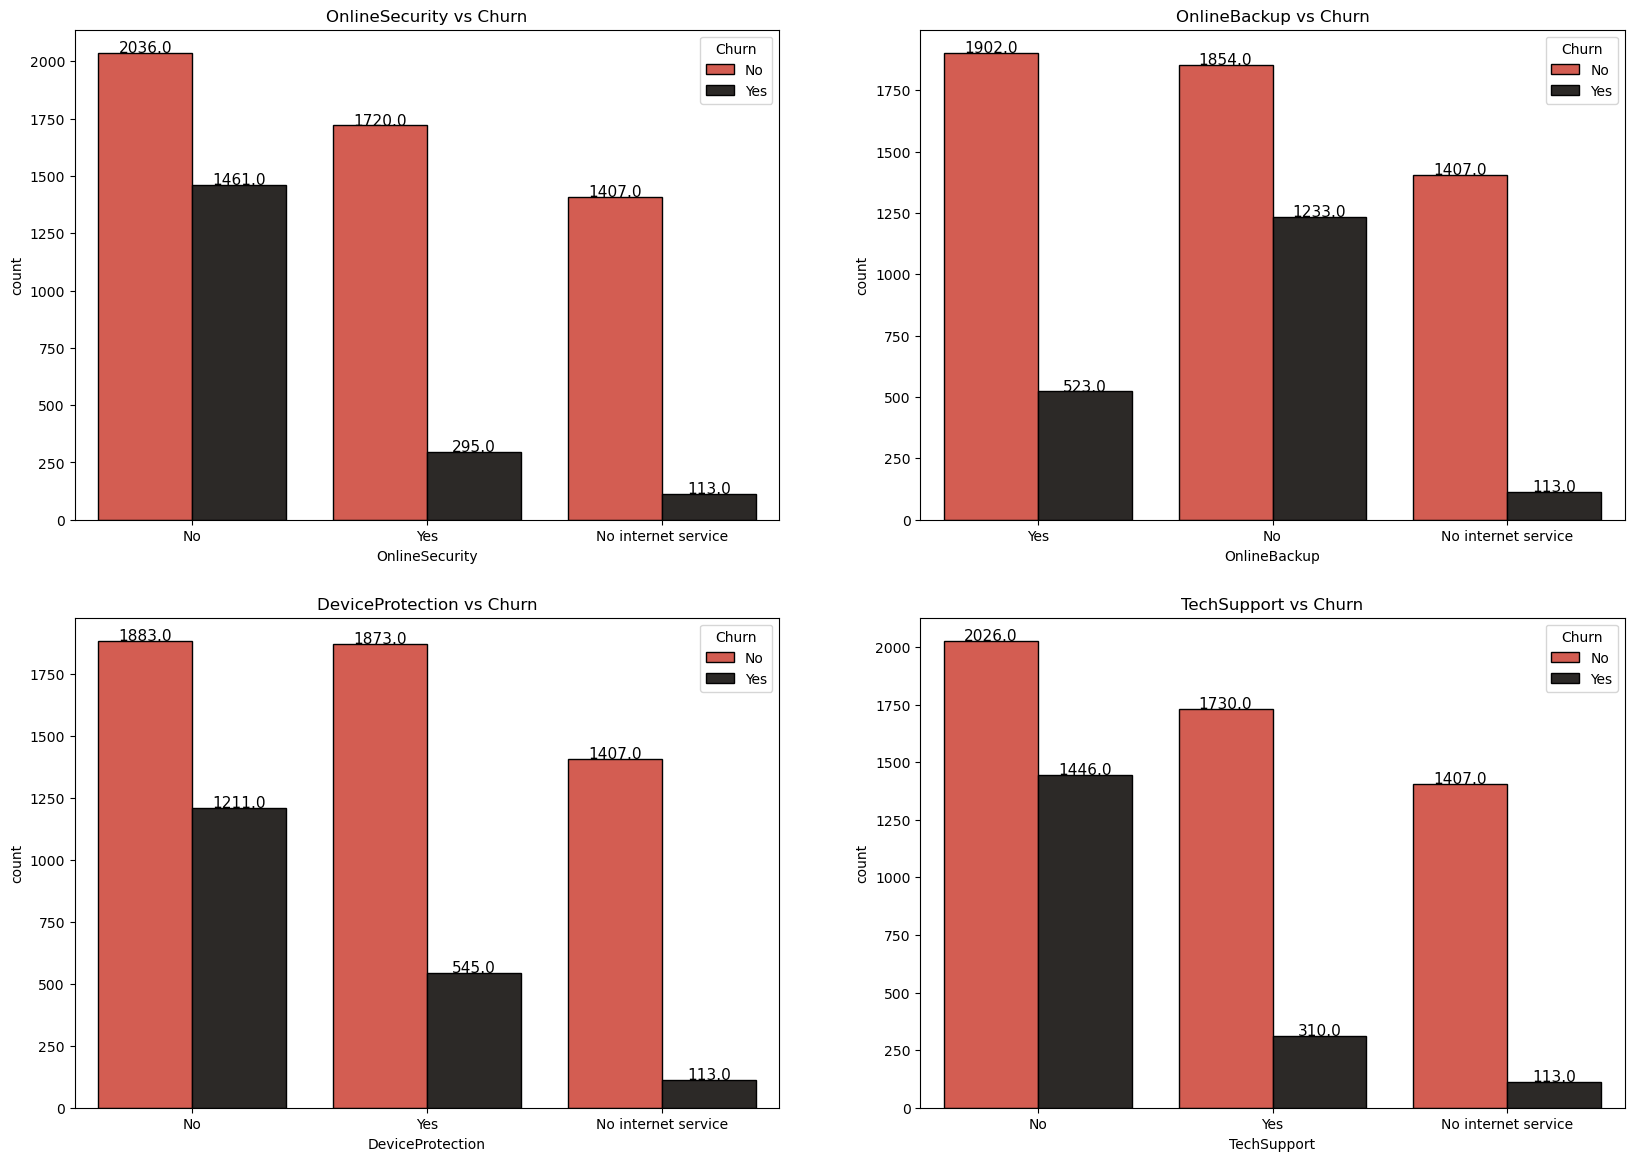

In [42]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x = l2[-4 + i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

- Customers with online security have less non-churns than customers with no online security but they have much less churns than customers without online security
- There's really not a lot that seperates customers that use or don't use online backup when it comes to non-churns but customers that don't use online backup have x2 more churns than customers that use online backup. For what it's worth, customers that use online backup have less churns
- There's really not a lot that seperates customers that use or don't use device protection when it comes to non-churns but customers that don't use device protection have x2 more churns than customers that use device protection. For what it's worth, customers that use device protection have less churns
- Customers with tech support have less non-churns than customers with no tech support but they have almost x5 less churns than customers without tech support
- When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!
- A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

Group 3 : Contract | PaperlessBilling | PaymentMethod |

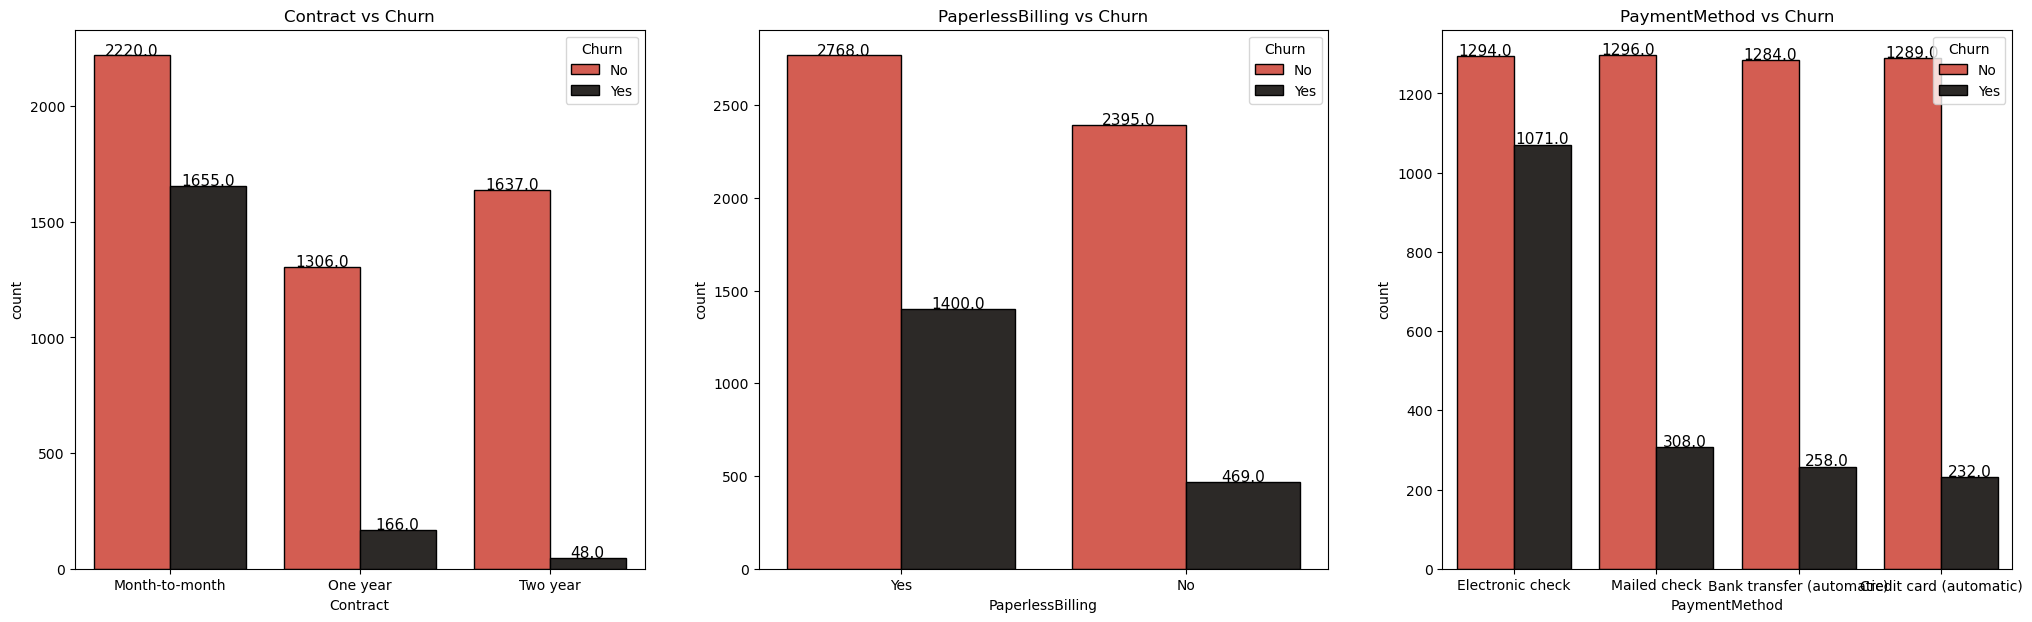

In [43]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x = l3[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x = l3[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x = l3[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
- Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
- PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
- Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

# Categorical Features vs Positive Target Variable (Churn Cases) :

Group 1 : Customer Information :¶
gender | SeniorCitizen | Partner | Dependents |

In [44]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

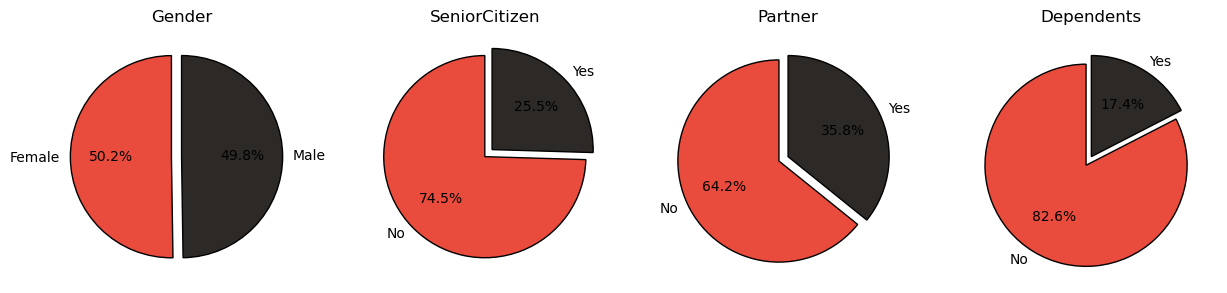

In [45]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!
- 75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!
- Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.

Group 2: Services Subscribed by the Customer :
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [46]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

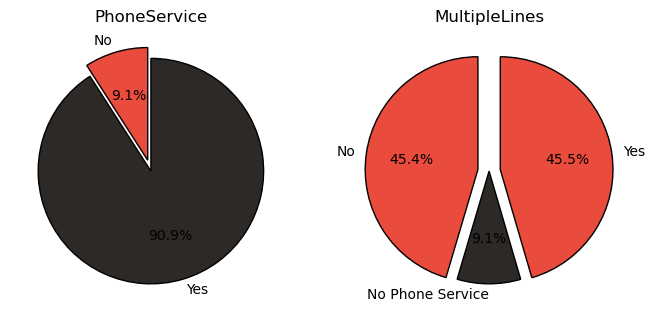

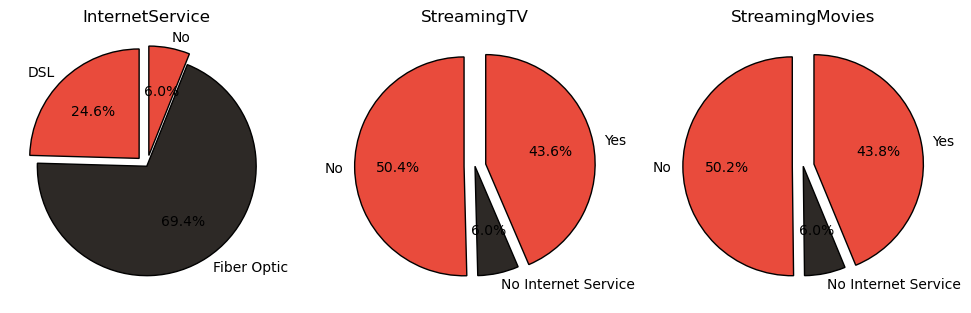

In [47]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

- Despite providing PhoneService, a high percentage of customers have switched!
- Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
- Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!
- For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

Group 2: Services Subscribed by the Customer :
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | 

In [48]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

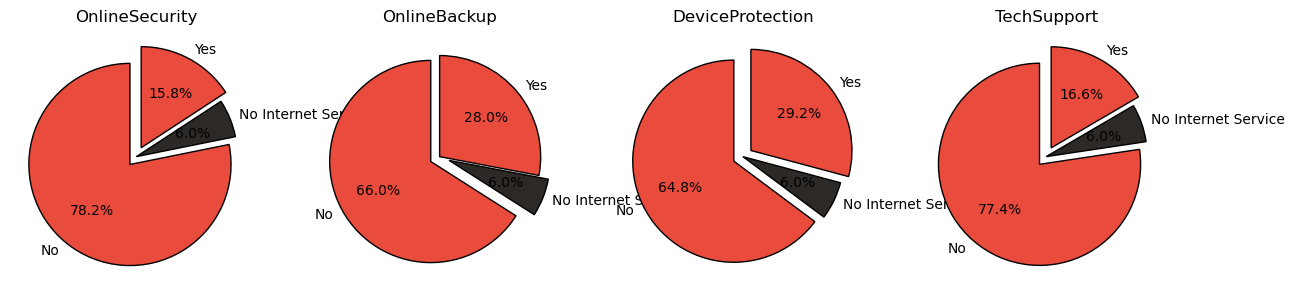

In [49]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features!

Group 3 : Contract | PaperlessBilling | PaymentMethod |

In [50]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

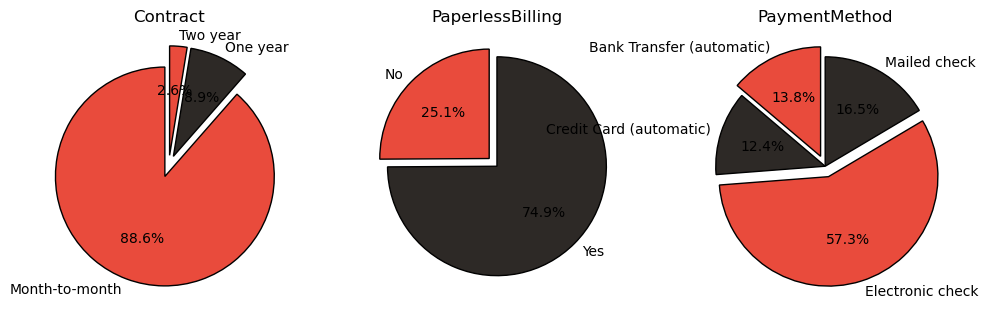

In [51]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers!
- PaperlessBilling does not seemed to be appreciated by the customers!
- Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!

# Numerical Features :


Distribution of Numerical Features :

In [64]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


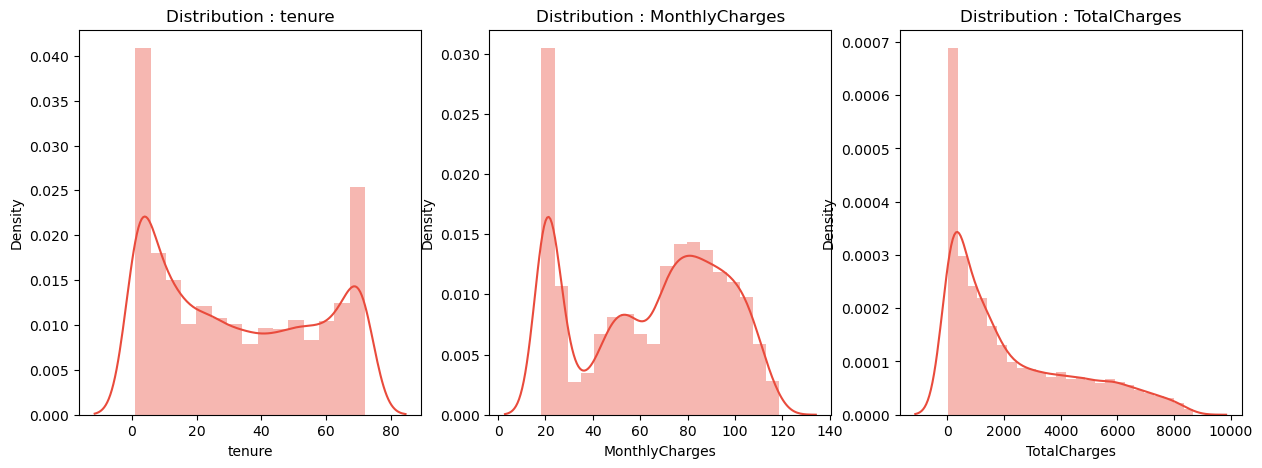

In [65]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
- TotalCharges displays a positively or rightly skewed distribution.

Numerical Features w.r.t Target Variable (Outcome)

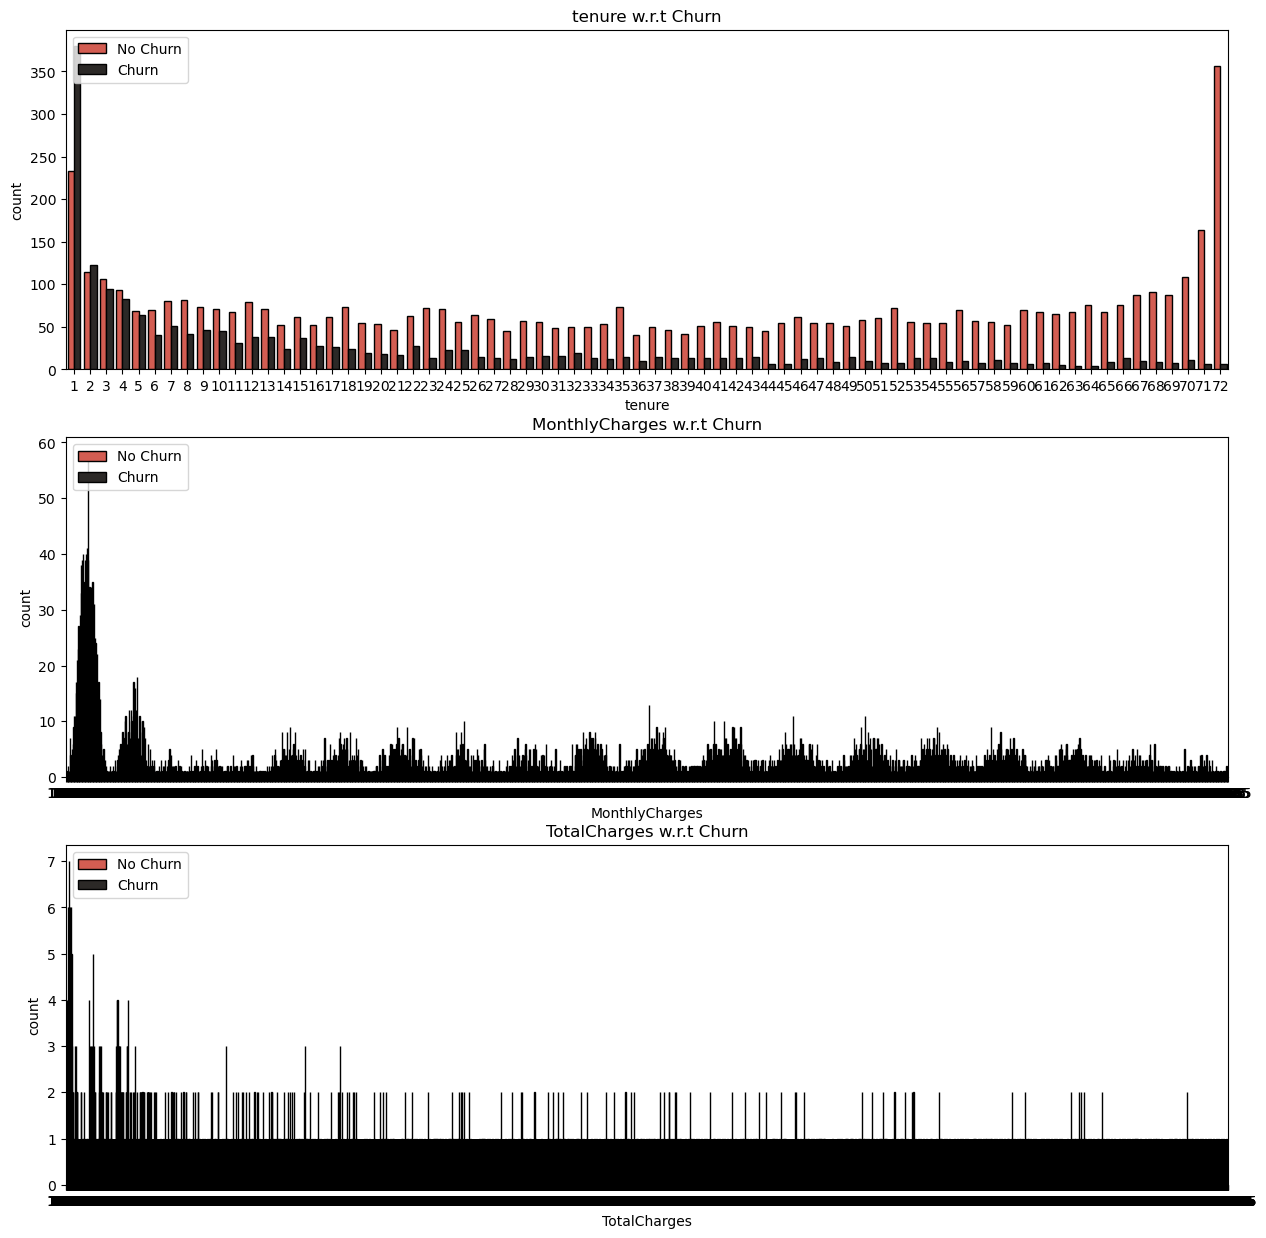

In [74]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=numerical_features[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.title(title);

- Considering tenure, a high number of customers have left after the 1st month. This high cancellation of services continues for 4 - 5 months but the churn customers have reduced since the 1st month. As the tenure increases, customers dropping out decreases.
- This results in low customer churning as the tenure increases. It displays a symmetrical graph with the left side dominating with churn numbers and right side dominating with low churn numbers.
- Because of too many unique data points in MonthlyCharges & TotalCharges, it is difficult to gain any type of insight. Thus, we will scale these numerical features for understandable visualization and gaining insights purposes. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 500 and assign its quotient value as the representative -constant for that data point. The scaling constants are decided by looking into the data & intuition.

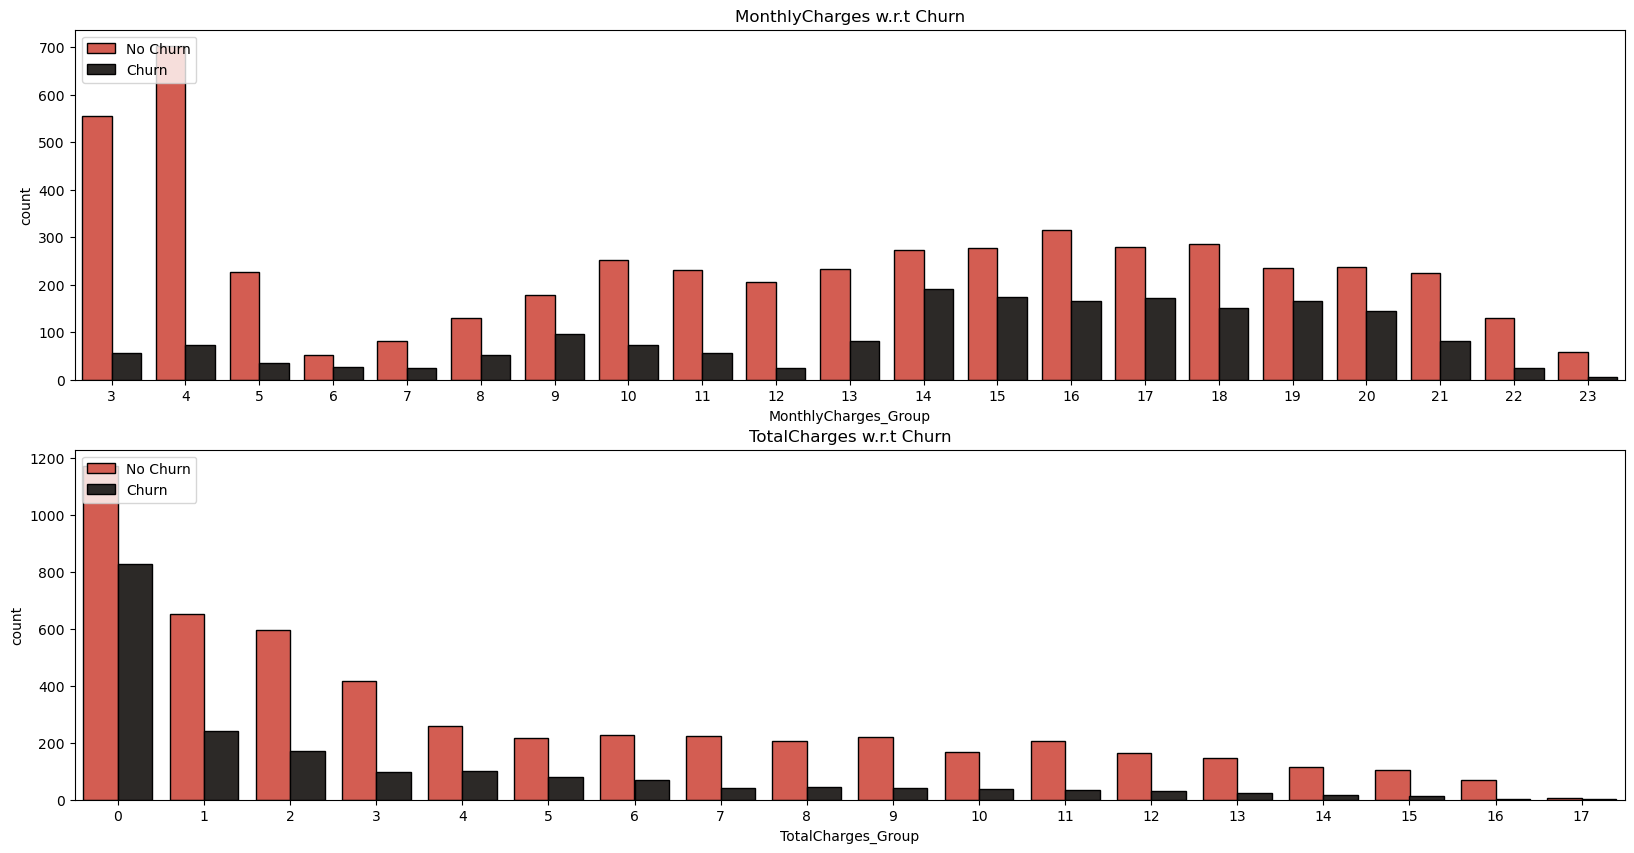

In [76]:
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(x =numerical_features[1 + i]+'_Group',data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title);

- For MonthlyCharges group, churn rate is high for the values between 65 (13x5) - 105 (21x5). This MonthlyCharges range of values caused the customers to switch.
- A very high number of customers opted out of the services for the TotalCharges below 500. This customer churning continues for a TotalCharges range of values from 0 (0x500) - 1000 (2x500).

# Numerical features vs Categorical features w.r.t Target variable (Churn) 

tenure vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

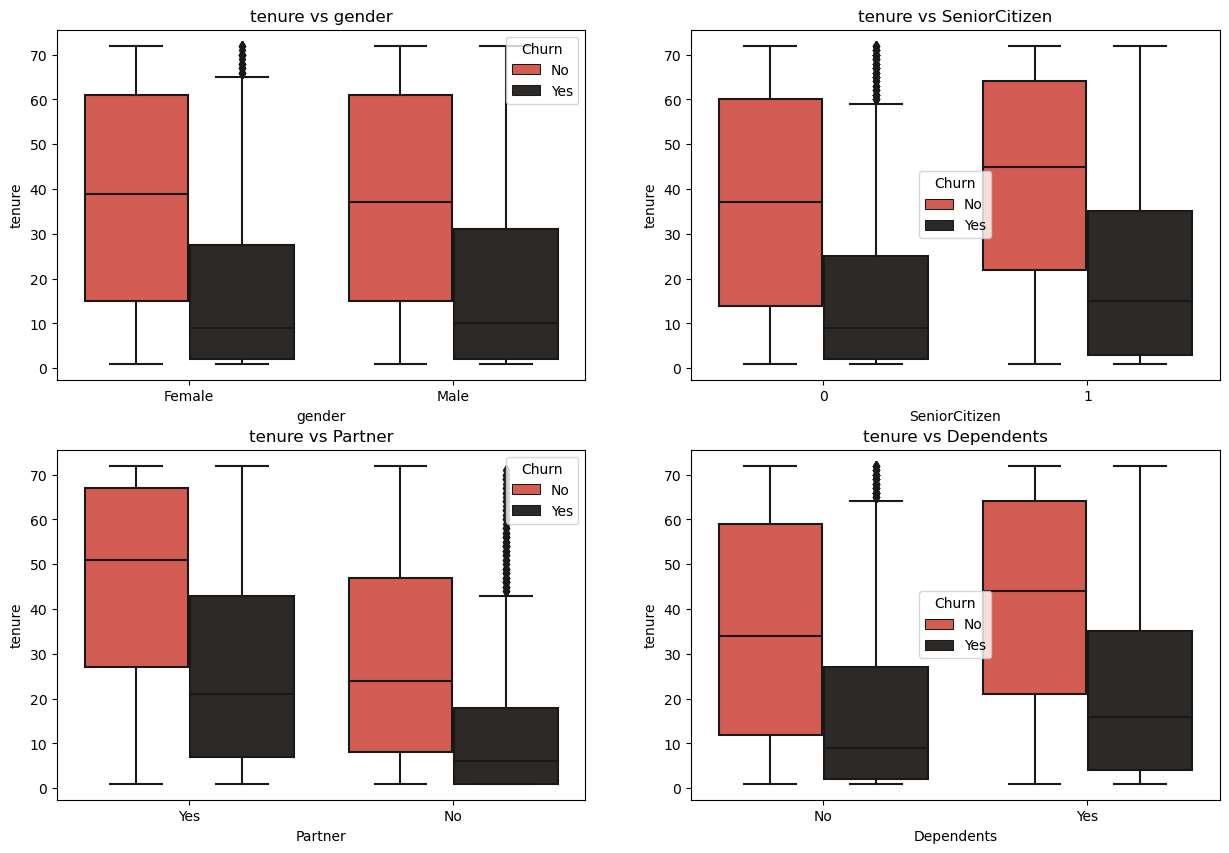

In [78]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l1[i]);

- Male & Female customer churn graphs are very similar.
- SeniorCitizen opted out from the services for a tenure values of 0 - 35 months. 20 - 35 months is the kind of decision making period about whether to continue or swtich for SeniorCitizen.
- Similarly, customers with partners continued with the service for a tenure of 30 - 65 months.

tenure vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

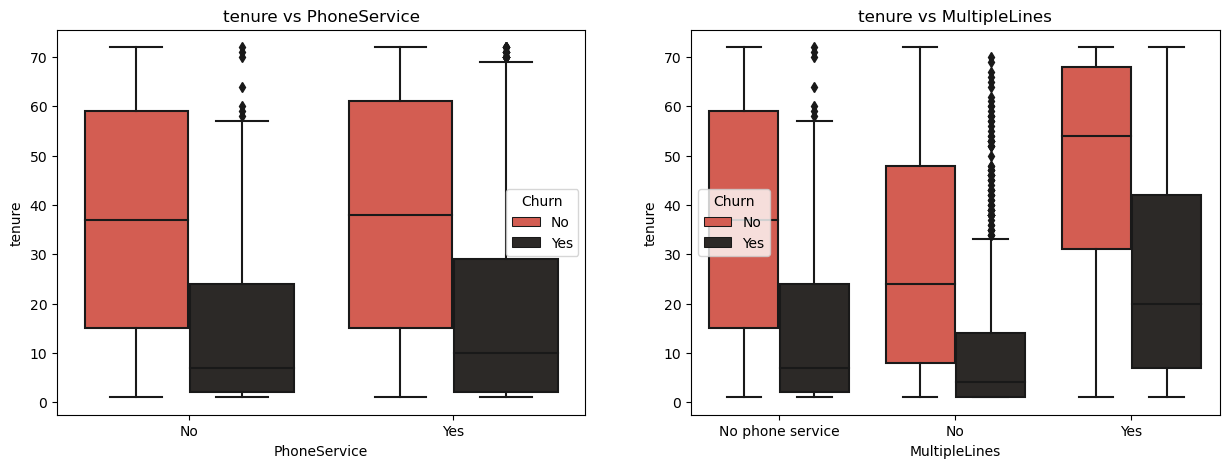

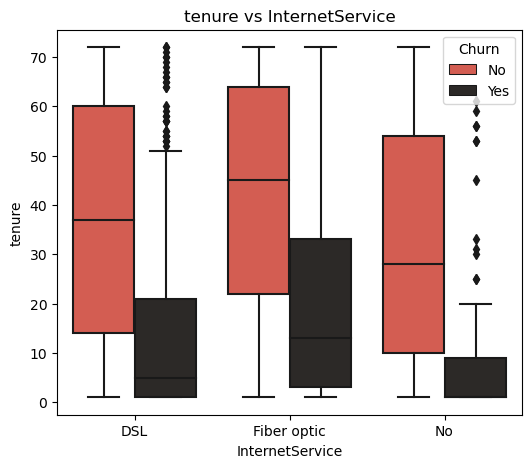

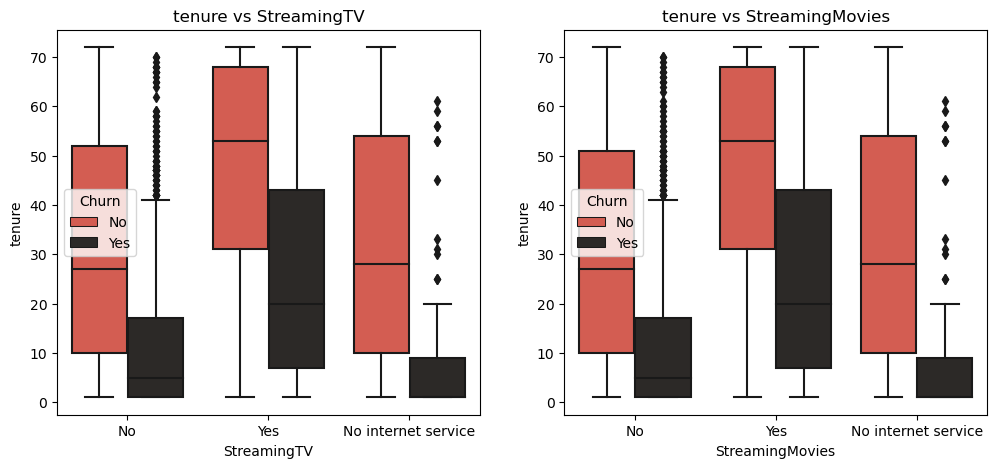

In [79]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'tenure',data = df,hue = 'Churn',palette = colors);
plt.title('tenure vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i + 3]);

- Presence of MutipleLines pushes the median MonthlyCharges irrespective if the customers opt out of the services or not.
- For the graph of tenure vs PhoneService, availability of PhoneService or not display a mirroring visuals. Customers were probably not heavy phone (call - message) users.
- For InternetService, customers seem to be very skeptical about the usage of Optic Fibre cables as the churning lasted for about 30 - 35 months before either carrying it forward or switching to a new one!
- Similary for StreamingTV & StreamingMovies, a churn tenure period of about 10 - 40 months can be observed!

tenure vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport

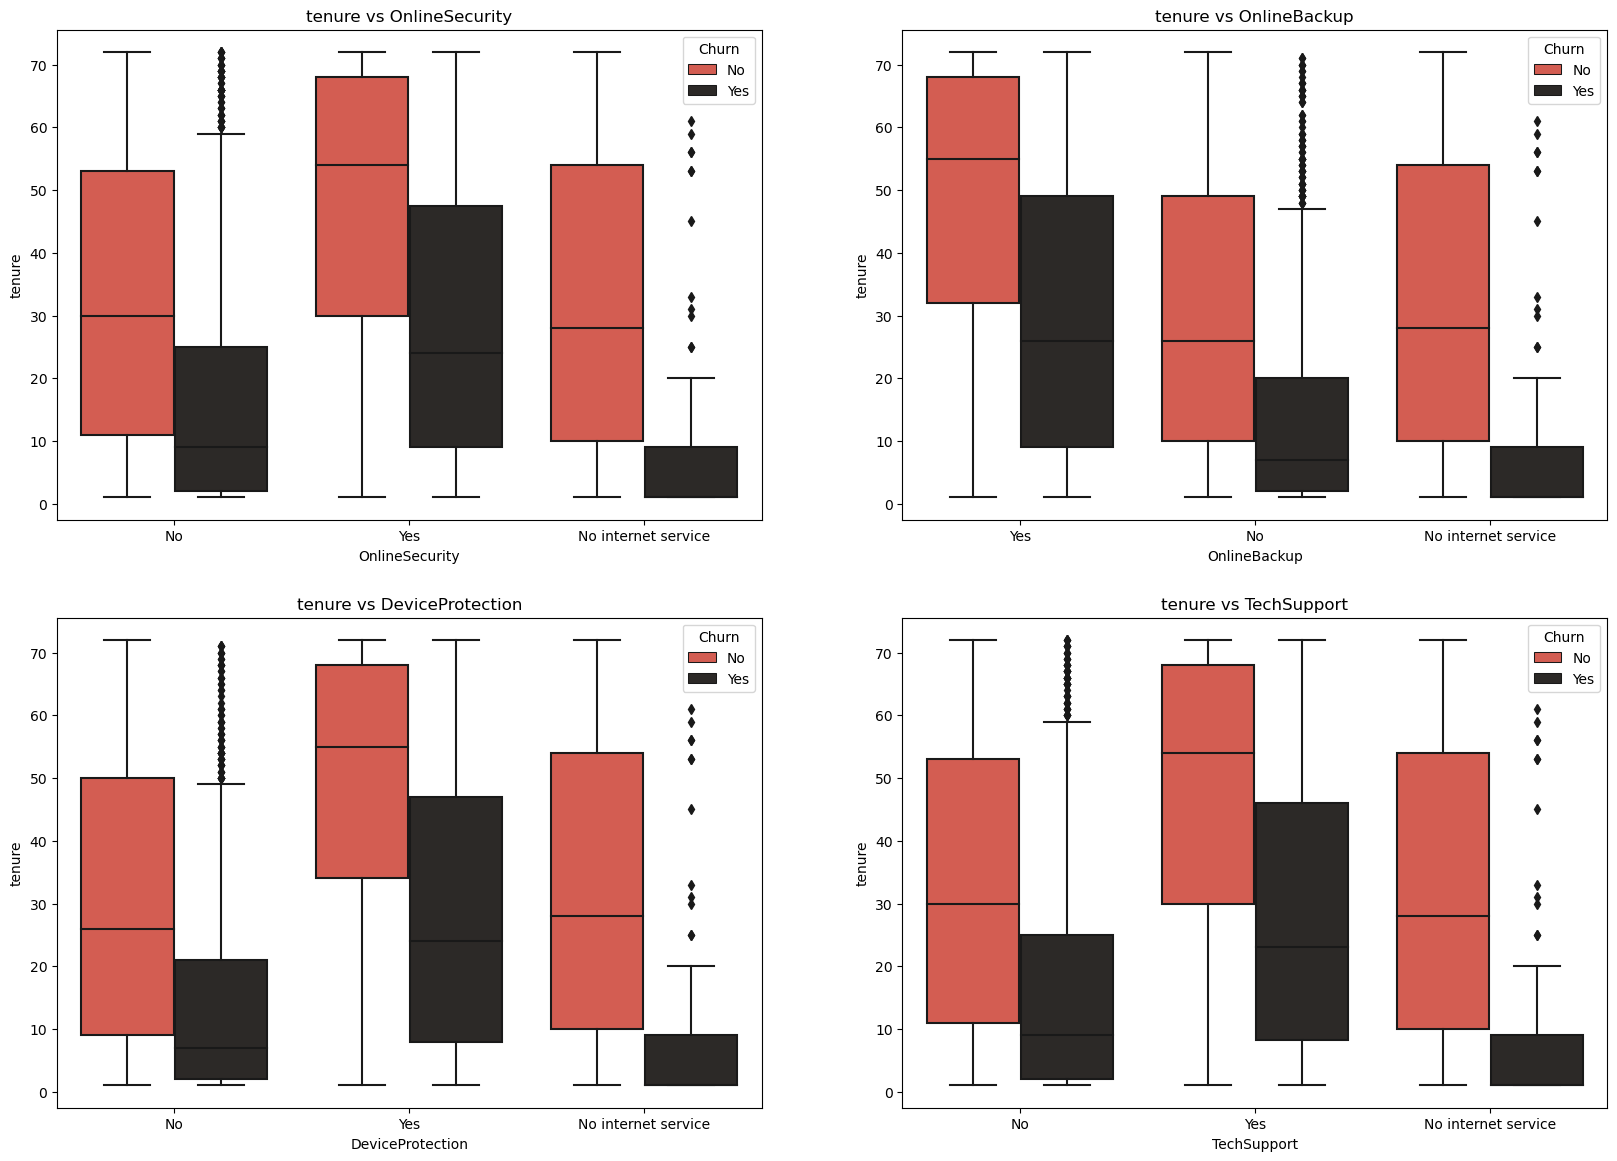

In [81]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);

- For OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport, median churn tenure value is of 25 months. The highest value of this churn tenure is of around 45 months.
- 30 - 35 month period is where the customers take a call about whether to continue with the current services or switch w.r.t above features!

tenure vs Group 3 : Contract | PaperlessBilling | PaymentMethod |

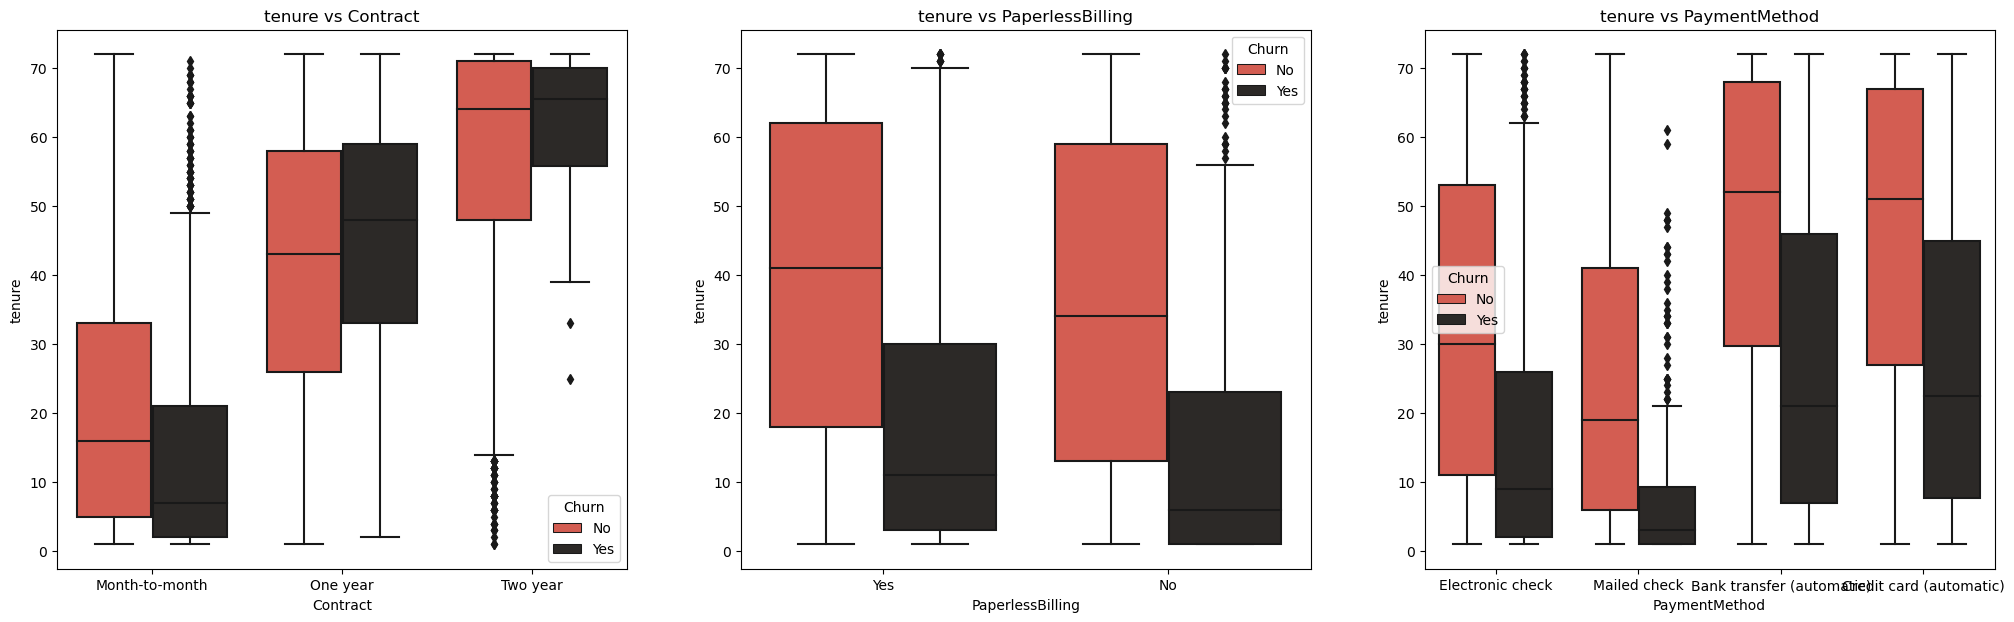

In [82]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l3[i]);

- When customers sign One year and Two year contracts for the services, they seem to continue with the services for about 25 and 45 months respectively! However, they start questioning the services and think about switching from the 35 month and 55 month mark respectively!
- Irrespective of the PaperlessBilling, customers think of switching right from the 1st month.
- When it comes to PaymentMethod, median churn tenure of Bank Transfer (automatic) & Credit Card (automatic), above 20 months, is nearly double than that of Electronic check & Mailed check, around 10 months & around 5 months respectively.

In [83]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.00,0,1,0,0,2,0,0,0,0,0,1,2,0.12,0.00,0
1,1,0,0,0,0.46,1,0,0,2,0,2,0,0,0,1,0,3,0.39,0.22,0
2,1,0,0,0,0.01,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.01,1
3,1,0,0,0,0.62,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.21,0
4,0,0,0,0,0.01,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.02,1


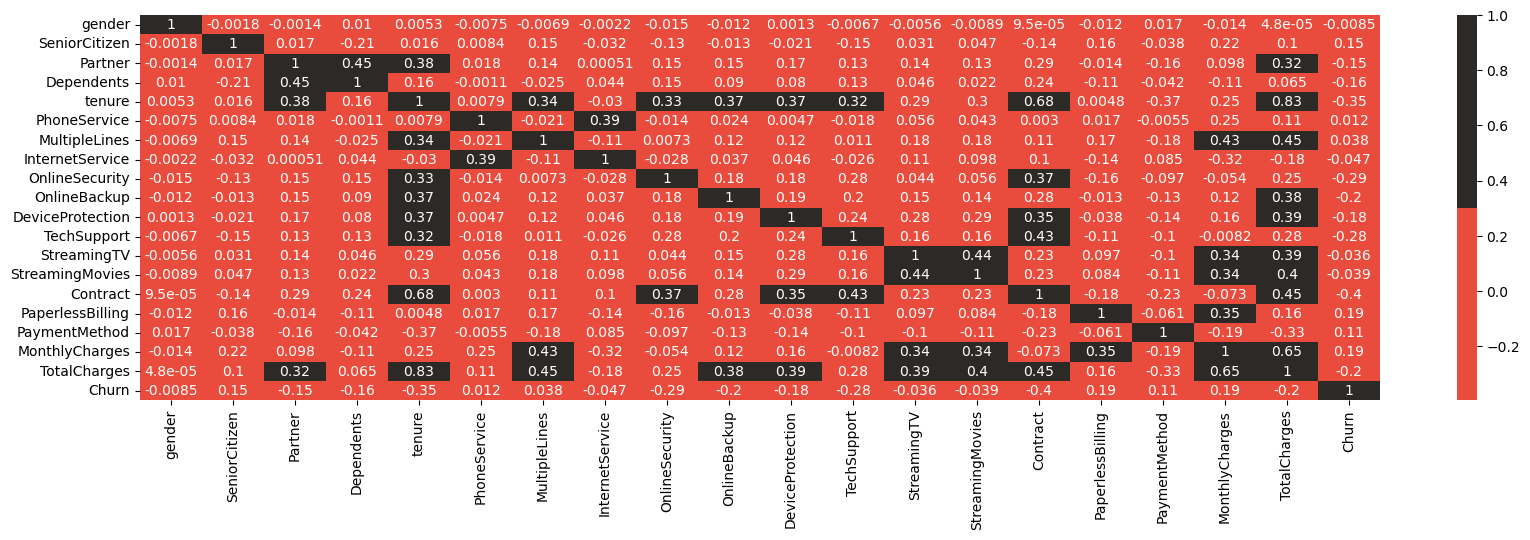

In [84]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

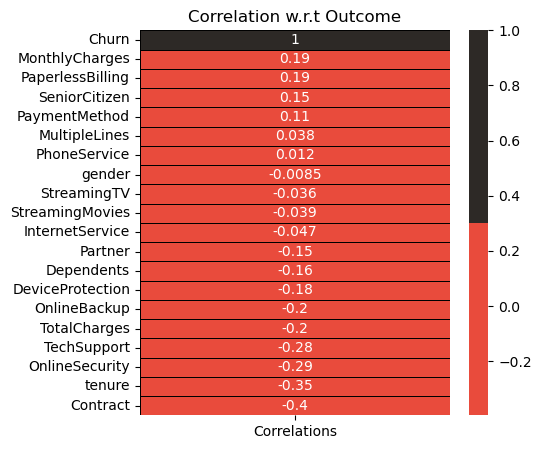

In [85]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. - We drop the features with correlation coefficient between (-0.1,0.1).
- Remaining features either display a significant positive or negative correlation.

Feature Selection for Categorical Features :

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

Chi-Squared Test :

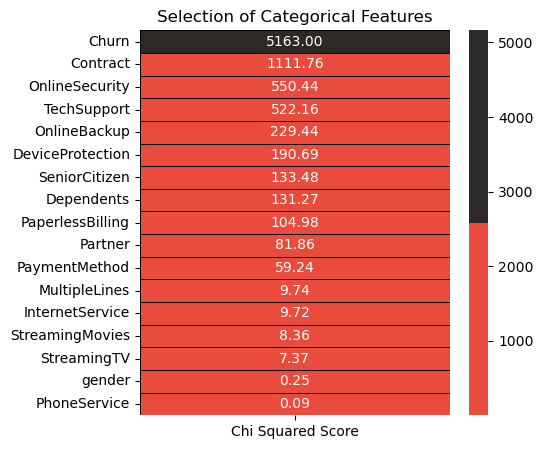

In [87]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

Feature Selection for Numerical Features :

In [88]:
from sklearn.feature_selection import f_classif

ANOVA Test 

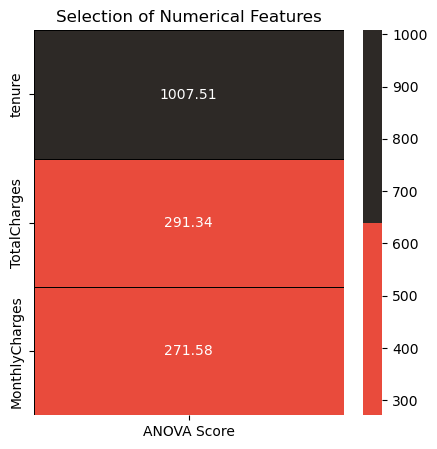

In [89]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
- From the above results, we need to include all the numerical features for modeling.

In [90]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.00,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.46,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.01,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.01,0,0,0,0,0,1,2,0.52,0.02,1


Data Balancing using SMOTE :

- In order to cope with unbalanced data, there are 2 options :

- Undersampling : Trim down the majority samples of the target variable.
- Oversampling : Increase the minority samples of the target variable to the majority samples.
- After doing trial-error with undersampling & oversampling, we have decided to go with oversampling!
- For data balancing, we will use imblearn.
- pip statement : pip install imbalanced-learn

In [1]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'imblearn'